In [2]:
import pandas as pd

import scipy.stats as st

from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_excel('result_df.xlsx', index_col=0)
df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,666743,interest,150000,NaN,Android,banner,0.50
1563367,1035593,interest,150000,NaN,Android,partner_network,1.00
1563366,800792,interest,150000,NaN,Android,partner_network,1.00
1563365,561010,interest,150000,NaN,iOS,partner_network,1.00
2025238,833649,interest,150000,NaN,Android,video,0.75


In [5]:
df['profit'] = df['profit'].fillna(0)
df['funnel_stage'] = df['funnel_stage'].str.lower()
df['price'] = df['price'].fillna(0)

In [16]:
ad_traffic = df[df['price'] != 0]
organic_traffic = df[df['price'] == 0]

In [19]:
organic_traffic.ad_channel.value_counts()

ad_channel
organic_traffic    142863
other                5343
Name: count, dtype: int64

In [28]:
df.funnel_stage.value_counts()

funnel_stage
interest         369970
consideration    205750
intent            23380
purchase           1789
Name: count, dtype: int64

In [29]:
interest_ad = round((len(ad_traffic[ad_traffic['funnel_stage'] == 'interest']) / len (ad_traffic) * 100), 2)
consideration_ad = round((len(ad_traffic[ad_traffic['funnel_stage'] == 'consideration']) / len (ad_traffic) * 100), 2)
intent_ad = round((len(ad_traffic[ad_traffic['funnel_stage'] == 'intent']) / len (ad_traffic) * 100), 2)
purchase_ad = round((len(ad_traffic[ad_traffic['funnel_stage'] == 'purchase']) / len (ad_traffic) * 100), 2)

In [32]:
interest_org = round((len(organic_traffic[organic_traffic['funnel_stage'] == 'interest']) / len (organic_traffic) * 100), 2)
consideration_org = round((len(organic_traffic[organic_traffic['funnel_stage'] == 'consideration']) / len (organic_traffic) * 100), 2)
intent_org = round((len(organic_traffic[organic_traffic['funnel_stage'] == 'intent']) / len (organic_traffic) * 100), 2)
purchase_org = round((len(organic_traffic[organic_traffic['funnel_stage'] == 'purchase']) / len (organic_traffic) * 100), 2)

In [33]:
ad_traffic['ones'] = 1
organic_traffic['ones'] = 1

C:\Users\semen\AppData\Local\Temp\ipykernel_5476\2044336352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ad_traffic['ones'] = 1
C:\Users\semen\AppData\Local\Temp\ipykernel_5476\2044336352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  organic_traffic['ones'] = 1


In [36]:
fs_ad = ad_traffic[['funnel_stage', 'ones']].groupby(by=['funnel_stage']).sum()
fs_ad

,ones
funnel_stage,
consideration,150310
intent,13898
interest,287270
purchase,1205


In [43]:
fs_org = organic_traffic[['funnel_stage', 'ones']].groupby(by=['funnel_stage']).sum()
fs_org

,ones
funnel_stage,
consideration,55440
intent,9482
interest,82700
purchase,584


In [50]:
import statsmodels.api as sm

# Зададим количество наблюдений для каждой группы
n1 = 150310 + 13898 + 287270 + 1205  # Общее количество наблюдений для fs_ad
n2 = 55440 + 9482 + 82700 + 584     # Общее количество наблюдений для fs_org

# Зададим количество успехов для каждой ступени воронки для каждой группы
# Например, для consideration:
successes_consideration_ad = 150310
successes_consideration_org = 55440

# Проведем z-тест для разности долей для каждой ступени воронки
z_stat_consideration, p_value_consideration = sm.stats.proportions_ztest([successes_consideration_ad, successes_consideration_org], [n1, n2], alternative='two-sided')

# Продолжим аналогичным образом для других ступеней воронки (intent, interest, purchase)
# ...

# Выведем результаты
print('Z-статистика (consideration):', z_stat_consideration)
print('p-значение (consideration):', p_value_consideration)
# ...
successes_consideration_ad = 13898
successes_consideration_org = 9482

# Проведем z-тест для разности долей для каждой ступени воронки
z_stat_intent, p_value_intent = sm.stats.proportions_ztest([successes_consideration_ad, successes_consideration_org], [n1, n2], alternative='two-sided')

# Выведем результаты
print('Z-статистика (intent):', z_stat_intent)
print('p-значение (intent):', p_value_intent)

# ...
successes_consideration_ad = 287270
successes_consideration_org = 82700

# Проведем z-тест для разности долей для каждой ступени воронки
z_stat_interest, p_value_interest = sm.stats.proportions_ztest([successes_consideration_ad, successes_consideration_org], [n1, n2], alternative='two-sided')

# Выведем результаты
print('Z-статистика (interest):', z_stat_interest)
print('p-значение (interest):', p_value_interest)

# ...
successes_consideration_ad = 1205
successes_consideration_org = 584

# Проведем z-тест для разности долей для каждой ступени воронки
z_stat_purchase, p_value_purchase = sm.stats.proportions_ztest([successes_consideration_ad, successes_consideration_org], [n1, n2], alternative='two-sided')

# Выведем результаты
print('Z-статистика (purchase):', z_stat_purchase)
print('p-значение (purchase):', p_value_purchase)



Z-статистика (consideration): -29.597582121383795
p-значение (consideration): 1.605253715494915e-192
Z-статистика (intent): -57.50044689323074
p-значение (intent): 0.0
Z-статистика (interest): 52.61015493449799
p-значение (interest): 0.0
Z-статистика (purchase): -7.841361527653678
p-значение (purchase): 4.456872268502453e-15


Результаты z-теста для ступени "consideration" следующие:

Z-статистика (consideration): -29.597582121383795

Данное значение показывает, что существует очень большое стандартизованное различие между долями в группе fs_ad и группе fs_org на ступени "consideration".
Отрицательный знак указывает на то, что доля в группе fs_org больше, чем в группе fs_ad на этой ступени.
P-значение (consideration): 1.605253715494915e-192 (или примерно 0)

P-значение очень близко к 0, что указывает на то, что вероятность получить такое или более сильное различие между группами, при условии, что нулевая гипотеза верна, крайне мала.
Интерпретация: Учитывая полученные результаты, мы можем заключить, что на ступени "consideration" между группами fs_ad и fs_org существует статистически значимое различие в долях. Более того, доля в группе fs_org значительно выше, чем в группе fs_ad на данной ступени.

In [37]:
value_counts_ad_traffic = ad_traffic['funnel_stage'].value_counts(normalize=True)
value_counts_ad_traffic

funnel_stage
interest         0.634594
consideration    0.332043
intent           0.030701
purchase         0.002662
Name: proportion, dtype: float64

In [44]:
value_counts_org_traffic = organic_traffic['funnel_stage'].value_counts(normalize=True)
value_counts_org_traffic

funnel_stage
interest         0.558007
consideration    0.374074
intent           0.063979
purchase         0.003940
Name: proportion, dtype: float64

In [53]:
grouped_data = organic_traffic.groupby(['ad_channel', 'funnel_stage']).size().unstack()

In [54]:
grouped_data

funnel_stage,consideration,intent,interest,purchase
ad_channel,,,,
organic_traffic,53618,9249,79456,540
other,1822,233,3244,44


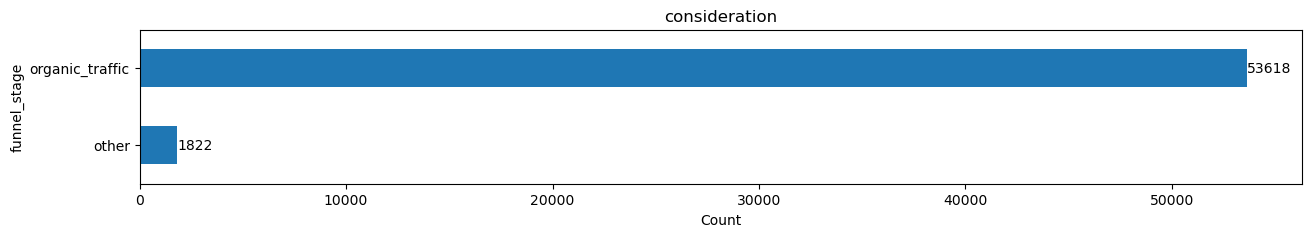

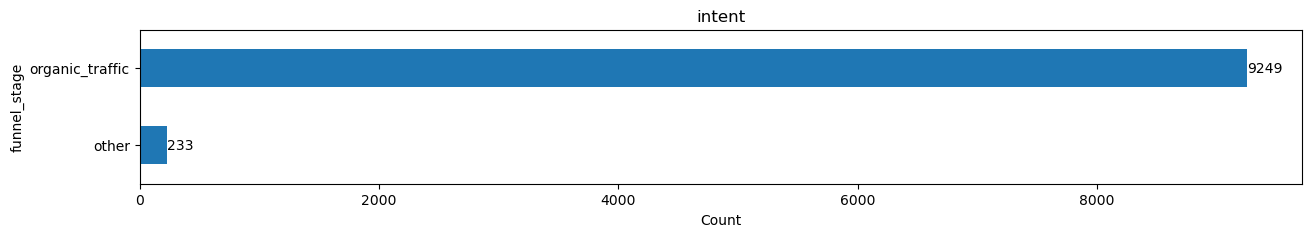

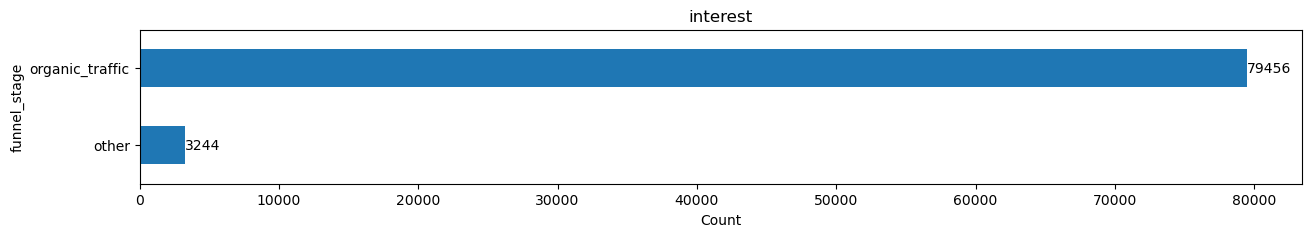

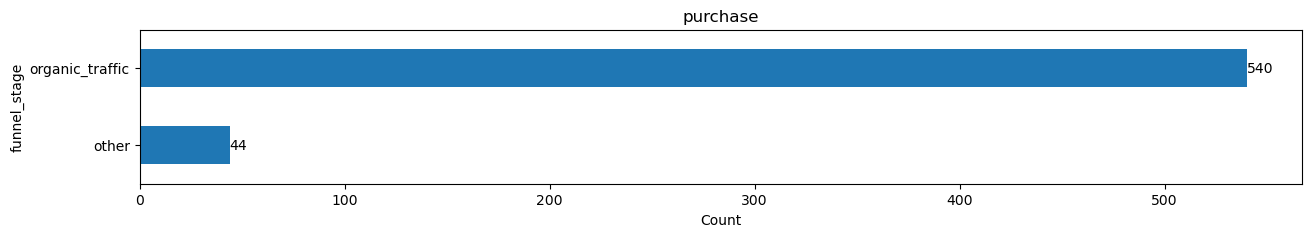

In [56]:
import matplotlib.pyplot as plt
for i in grouped_data.columns:
    ax = grouped_data[i].sort_values().plot(kind='barh', stacked=True, figsize=(15, 2))
    
    plt.title(i)
    plt.xlabel('Count')
    plt.ylabel('funnel_stage')
    for rect in ax.patches:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2, f'{width:.0f}', ha='left', va='center')
    plt.show()

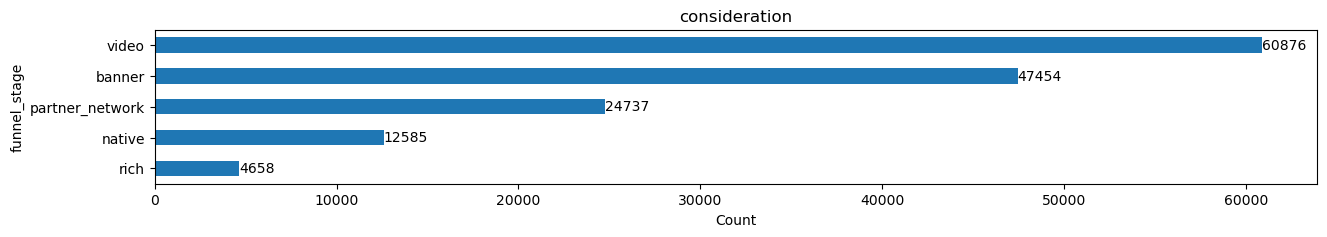

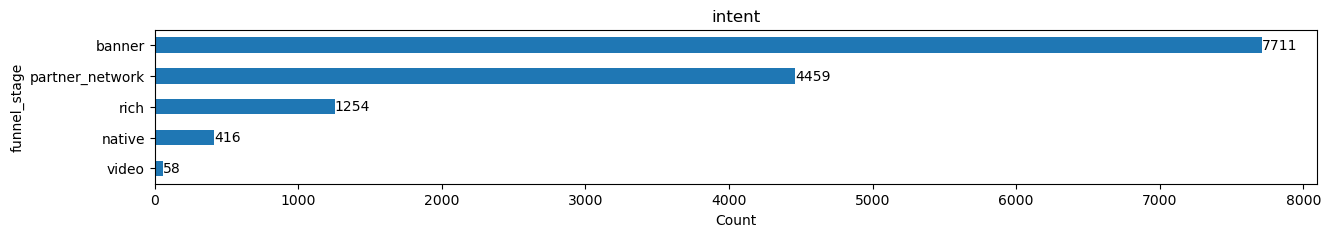

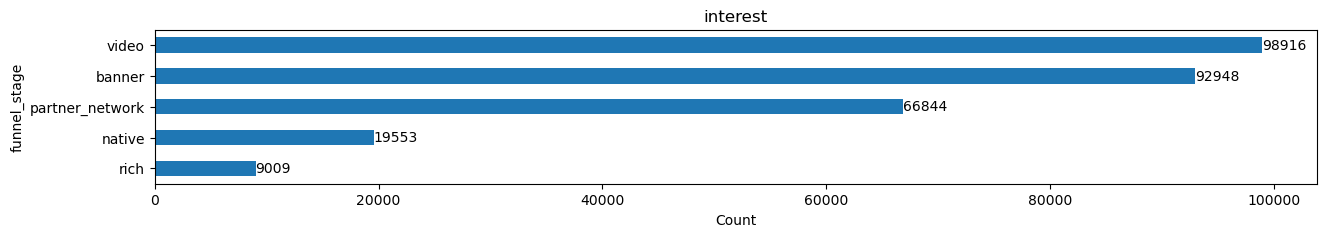

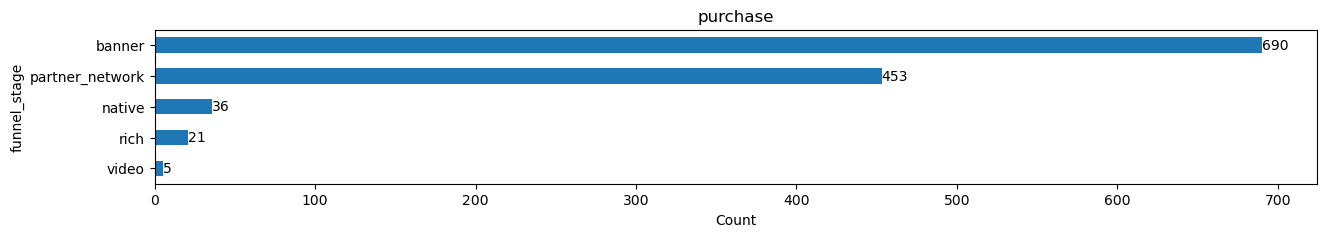

In [57]:
grouped_data = ad_traffic.groupby(['ad_channel', 'funnel_stage']).size().unstack()
import matplotlib.pyplot as plt
for i in grouped_data.columns:
    ax = grouped_data[i].sort_values().plot(kind='barh', stacked=True, figsize=(15, 2))
    
    plt.title(i)
    plt.xlabel('Count')
    plt.ylabel('funnel_stage')
    for rect in ax.patches:
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2, f'{width:.0f}', ha='left', va='center')
    plt.show()

In [58]:
grouped_data = df.groupby(['funnel_stage', 'ad_channel']).size().unstack()

In [59]:
grouped_data

ad_channel,banner,native,organic_traffic,other,partner_network,rich,video
funnel_stage,,,,,,,
consideration,47454,12585,53618,1822,24737,4658,60876
intent,7711,416,9249,233,4459,1254,58
interest,92948,19553,79456,3244,66844,9009,98916
purchase,690,36,540,44,453,21,5


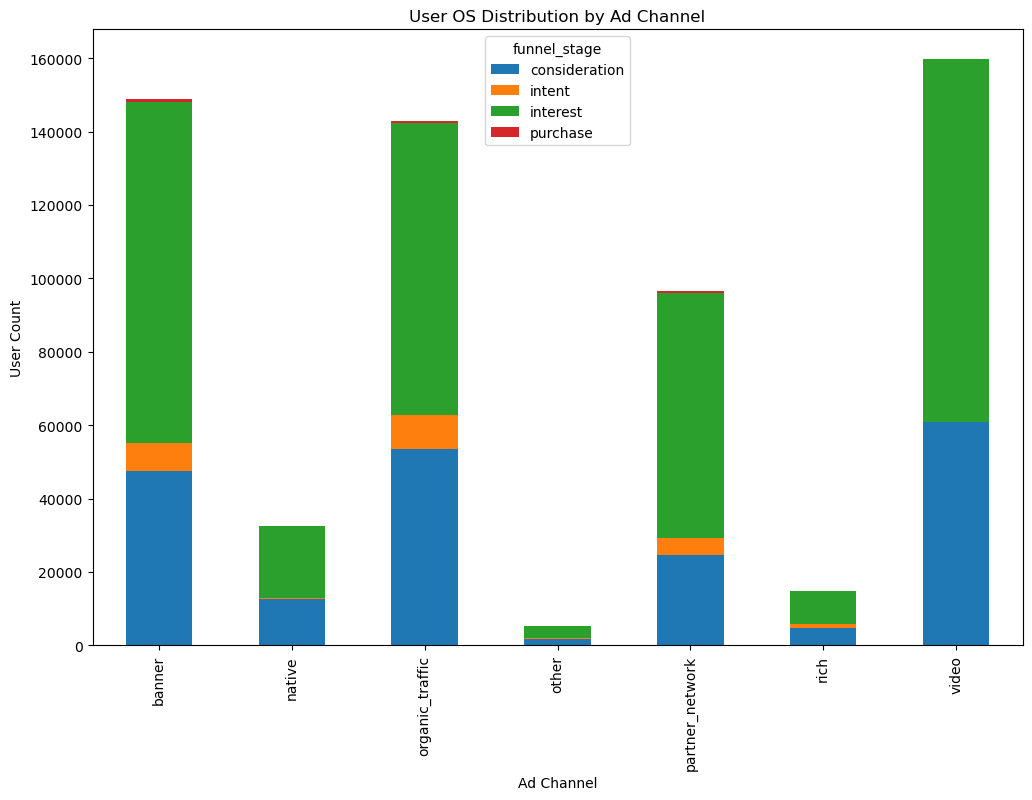

In [61]:
grouped_data = df.groupby(['ad_channel', 'funnel_stage']).size().unstack()

# Построение графика
grouped_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('User OS Distribution by Ad Channel')
plt.xlabel('Ad Channel')
plt.ylabel('User Count')
plt.show()

In [ ]:
X = df.iloc[:, :-1]
y = df['y']

In [ ]:
sc = StandardScaler()

In [ ]:
X_sc = sc.fit_transform(X)

In [ ]:
fa = FactorAnalyzer(n_factors=3)

In [ ]:
fa.fit(X_sc)

FactorAnalyzer(rotation_kwargs={})

In [ ]:
ev, _ = fa.get_eigenvalues()

In [ ]:
n_factors = (ev > 1).sum()

In [ ]:
n_factors

17

In [ ]:
fa = FactorAnalyzer(n_factors=n_factors)

In [ ]:
fa.fit(X_sc)

FactorAnalyzer(n_factors=17, rotation_kwargs={})

In [ ]:
loadings = pd.DataFrame(fa.loadings_,
                        index=X.columns,
                        columns=['factor_{x}'.format(x=x+1) for x in range(n_factors)])

In [ ]:
loadings.sort_values(by='factor_6', ascending=False)

,factor_1,factor_2,factor_3,factor_4,factor_5,factor_6,factor_7,factor_8,factor_9,factor_10,factor_11,factor_12,factor_13,factor_14,factor_15,factor_16,factor_17
job_retired,0.016541,0.162393,-0.024154,-0.124472,0.058293,0.773038,0.045825,0.009017,-0.023647,-0.049023,-0.049584,0.050432,-0.096352,-0.018959,0.008239,0.019716,-0.036127
age,0.030635,0.102646,0.322156,-0.059776,0.049801,0.717340,0.032721,0.140488,0.032296,-0.037686,0.058355,0.079771,-0.034813,-0.034017,0.024576,0.013910,-0.016087
education_secondary,-0.029110,0.852018,0.016972,-0.015632,-0.001636,0.211866,-0.016368,-0.031036,0.120279,0.036669,-0.181576,-0.635531,0.018053,0.015326,-0.091848,-0.008503,-0.033605
balance,0.010551,-0.069528,0.012786,-0.000207,0.002747,0.128649,0.011778,-0.021055,0.016554,-0.015824,-0.001120,-0.020543,0.001683,-0.019746,0.015801,0.003160,0.007933
job_entrepreneur,0.115043,-0.027219,-0.031267,0.099659,0.048622,0.088703,0.067013,-0.101623,0.060498,-0.041869,0.037788,0.012628,-0.025647,-0.063795,1.090346,0.021977,-0.059750
contact_telephone,0.044210,0.129774,-0.138560,0.120518,0.036010,0.086999,0.095717,0.096450,1.100604,-0.042960,-0.090442,-0.005959,0.075906,0.011713,0.048190,-0.026847,0.013246
poutcome_unknown,-0.889804,-0.002599,-0.047656,-0.216237,0.082885,0.078173,0.041428,-0.048814,-0.080611,0.023566,0.010583,0.007027,0.014930,-0.005377,-0.062724,-0.183204,-0.012258
job_housemaid,-0.019506,0.020340,0.011356,-0.002369,-0.016784,0.057609,-0.004055,0.006868,0.012955,0.014275,-0.008406,0.157323,-0.000486,0.014205,-0.002979,-0.007261,-0.004063
marital_divorced,0.079762,-0.109708,0.064068,0.092621,-0.013474,0.056882,-0.013771,1.088304,0.096207,0.011442,0.089839,-0.024504,-0.000744,-0.018681,-0.083474,0.024672,0.003274
poutcome_other,0.050178,0.027597,-0.015315,-0.215531,-0.021130,0.047979,0.003638,0.028963,-0.032251,-0.000191,-0.023336,-0.004770,0.014063,0.004496,0.021262,1.025881,0.004225


In [ ]:
alpha = 0.95

In [ ]:
res = st.pearsonr(df['poutcome_failure'], df['pdays'])
res

PearsonRResult(statistic=0.7010523794843222, pvalue=0.0)

In [ ]:
res.confidence_interval(confidence_level=alpha)

ConfidenceInterval(low=0.6963343948261674, high=0.7057097787851632)

In [ ]:
res = st.pearsonr(df['education_secondary'], df['job_technician'])
res

PearsonRResult(statistic=0.1574433826189694, pvalue=9.157614509460852e-249)

In [ ]:
res.confidence_interval(confidence_level=alpha)

ConfidenceInterval(low=0.1484409944348373, high=0.16641967861754034)

In [ ]:
res = st.pearsonr(df['marital_married'], df['age'])
res

PearsonRResult(statistic=0.28625688005679306, pvalue=0.0)

In [ ]:
res.confidence_interval(confidence_level=alpha)

ConfidenceInterval(low=0.2777720087330492, high=0.2946970917747956)

In [ ]:
res = st.pearsonr(df['marital_single'], df['poutcome_success'])
res

PearsonRResult(statistic=0.026105285096545534, pvalue=2.831840237592431e-08)

In [ ]:
res.confidence_interval(confidence_level=alpha)

ConfidenceInterval(low=0.01689153147202334, high=0.03531460550722245)